# 5. Árboles de Decisión

Veremos *árboles de decisión* y los conceptos subyacentes asociados.

Haremos ejemplos de juguete, y con datos generados artificialmente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cPositive = 'dodgerblue'
cNegative = 'tomato'

## Entropía y Ganancia de Información

### Entropía

Definamos *entropía* para una distribución probabilística:

$$H(Y) = - \sum_{i = 1}^{k} P(Y = y_{i}) log_{2} P(Y = y_{i})$$

In [3]:
def entropy(probs):
    """
    Calcula la entropía de una VA según sus probabilidades.
    """
    return - np.sum(probs * np.log2(probs))

Veamos posibles *entropías* para el problema de tirar una moneda adulterada:

In [4]:
entropy(np.array([0.5, 0.5]))

1.0

In [5]:
entropy(np.array([0.01, 0.99]))

0.08079313589591118

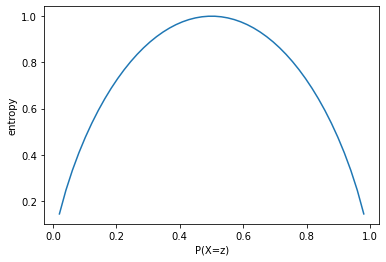

In [6]:
X = np.linspace(0, 1)[1 : -1] # Evitamos warnings por probabilidad cero

plt.plot(X, [entropy([p, 1 - p]) for p in X])
plt.xlabel('P(X=z)')
plt.ylabel('entropy')
plt.show()

La *entropía* se puede interpretar como la **cantidad de bits necesarios para codificar una predicción**.
En el caso de dos monedas, tenemos cuatro resultados posibles.
Ejemplos:

In [7]:
entropy(np.array([0.25, 0.25, 0.25, 0.25]))

2.0

In [8]:
entropy(np.array([0.49, 0.49, 0.01, 0.01]))

1.1414405425418206

### Entropía de un Dataset

Un dataset define una distribución **empírica**.
La *entropía* del dataset es entonces la *entropía* de la distribución asociada.
Definamos el cálculo de la distribución, y luego redefinamos *entropía*:

In [9]:
def probs(y):
    """
    Calcula las probabilidades de una VA según el conjunto de datos.
    """
    _, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return probs

In [10]:
y_true = np.array([1, 1, 1, 1, 1, -1])

In [11]:
probs(y_true)

array([0.16666667, 0.83333333])

In [12]:
def entropy(y):
    """
    Calcula la entropía de una VA según el conjunto de datos.
    """
    p = probs(y)
    return - np.sum(p * np.log2(p))

In [13]:
entropy(y_true)

0.6500224216483541

### Entropía Condicional

Definamos *entropía condicional*:

$$H(Y|X) = - \sum_{j = 1}^{v} P(X = x_{j}) \sum_{i = 1}^{k} P(Y = y_{i} | X = x_{j}) log_{2} P(Y = y_{i} | X = x_{j})$$

Equivalentemente, 

$$H(Y|X) = \sum_{j = 1}^{v} P(X = x_{j}) H(Y|X = x_{j})$$

Tomaremos $X$ binaria ($v=2$), por lo que la *entropía condicional* tendrá sólo dos términos.

In [14]:
def cond_entropy(y1, y2):
    """
    Calcula la entropía condicional de una VA en base a otra VA (binaria).
    """
    size = len(y1) + len(y2)
    return len(y1) / size * entropy(y1) + len(y2) / size * entropy(y2)

In [15]:
X1 = {
    'left': np.array([1, 1, 1, 1]),
    'right':np.array([1, -1]),
}

X2 = {
    'left': np.array([1, 1, 1]),
    'right': np.array([1, 1, -1]),
}

In [16]:
cond_entropy(X1['left'], X1['right']) # X1

0.3333333333333333

In [17]:
cond_entropy(X2['left'], X2['right']) # X2

0.4591479170272448

### Ganancia de Información

La ganancia de información será simplemente la diferencia entre *entropía* y *entropía condicional*:

In [18]:
def information_gain(y1, y2):
    """
    Calcula la Ganancia de Información según las VAs.
    """
    y = np.concatenate((y1, y2))
    return entropy(y) - cond_entropy(y1, y2)

In [19]:
information_gain(X1['left'], X1['right']) # X1

0.3166890883150208

In [20]:
information_gain(X2['left'], X2['right']) # X2

0.19087450462110933

## Datos Sintéticos No Linealmente Separables

Haremos algunos experimentos con datos generados sintéticamente.
Estos datos serán **no linealmente separables**.

Ejemplos típicos de datos no linealmente separables son los de tipo `OR`, `AND`, y `XOR`.
Usaremos datos de tipo `OR` para este ejemplo.

In [21]:
size = 200

In [22]:
np.random.seed(0)

# Muestra de una Distribución Normal
X = np.random.randn(size, 2)

# Datos OR
y_true = np.logical_or(X[:, 0] > 0, X[:, 1] > 0)
y_true = y_true.astype(int)

y_true[y_true == 0] = -1

**Datos `XOR`**

`y_true = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)`

**Datos `AND`**

`y_true = np.logical_and(X[:, 0] > 0, X[:, 1] > 0)`

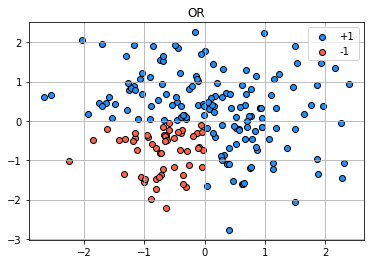

In [23]:
plt.scatter(X[y_true == +1, 0], X[y_true == +1, 1], color=cPositive, edgecolors='k', label='+1')
plt.scatter(X[y_true == -1, 0], X[y_true == -1, 1], color=cNegative, edgecolors='k', label='-1')

plt.title('OR')
plt.legend()
plt.grid()
plt.show()

### División en Entrenamiento y Evaluación

Separemos la mitad para entrenamiento y la otra para evaluación.

In [24]:
train_size = size // 2

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]

X_train.shape, X_test.shape

((100, 2), (100, 2))

### Clasificación Lineal

Veamos qué tan mal anda un clasificador lineal sobre estos datos.

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train);

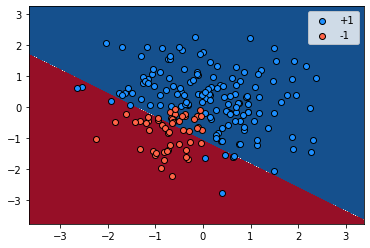

In [26]:
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: model.predict(x), X, y_true)

Calculemos la calidad de la predicción en entrenamiento y en evaluación:

In [27]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.91
Test accuracy: 0.78


### Nota al Margen: Induciendo Separabilidad Lineal

Muchas veces se pueden convertir datos *no linealmente separables* en datos separables (o casi) mediante la introducción de nuevos atributos que combinan los atributos existentes.
Un ejemplo de estos son los atributos polinomiales.

Aquí lo haremos con datos `OR`, pero la diferencia es mucho más notable con datos de tipo `XOR`.

In [28]:
from sklearn.preprocessing import PolynomialFeatures

pre = PolynomialFeatures(
    degree=2,
    interaction_only=True, # Usar solo x0*x1, no x0*x0 ni x1*x1.
    include_bias=False
)

X_train_PF = pre.fit_transform(X_train)

X_train.shape, X_train_PF.shape # Se agregó el feature x0*x1

((100, 2), (100, 3))

In [29]:
X_train[0], X_train_PF[0]

(array([1.76405235, 0.40015721]), array([1.76405235, 0.40015721, 0.70589826]))

Grafiquemos:

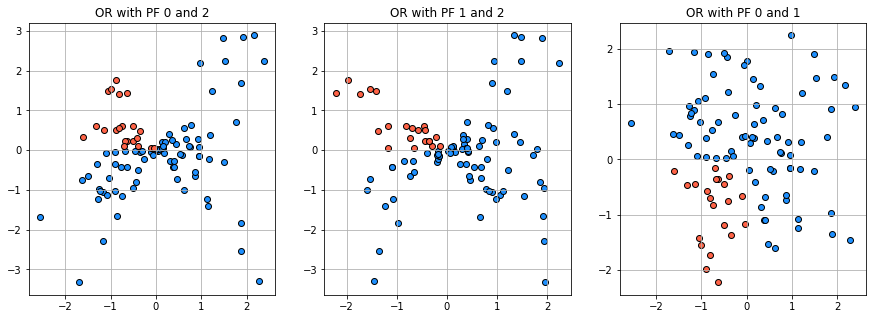

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# PF 0 y 2
axs[0].scatter(X_train_PF[y_train == +1, 0],
               X_train_PF[y_train == +1, 2],
               color=cPositive, edgecolors='k', label='+1')
axs[0].scatter(X_train_PF[y_train == -1, 0],
               X_train_PF[y_train == -1, 2],
               color=cNegative, edgecolors='k', label='-1')

axs[0].set_title('OR with PF 0 and 2')
axs[0].grid()

# PF 1 y 2
axs[1].scatter(X_train_PF[y_train == +1, 1],
               X_train_PF[y_train == +1, 2],
               color=cPositive, edgecolors='k', label='+1')
axs[1].scatter(X_train_PF[y_train == -1, 1],
               X_train_PF[y_train == -1, 2],
               color=cNegative, edgecolors='k', label='-1')

axs[1].set_title('OR with PF 1 and 2')
axs[1].grid()

# PF 0 y 1
axs[2].scatter(X_train_PF[y_train == +1, 0],
               X_train_PF[y_train == +1, 1],
               color=cPositive, edgecolors='k', label='+1')
axs[2].scatter(X_train_PF[y_train == -1, 0],
               X_train_PF[y_train == -1, 1],
               color=cNegative, edgecolors='k', label='-1')

axs[2].set_title('OR with PF 0 and 1')
axs[2].grid()

In [31]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    LogisticRegression()
)

model.fit(X_train, y_train);

In [32]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.97
Test accuracy: 0.86


### Entropía y Valores Reales

Calculemos la *entropía* inicial, y veamos cómo condicionar la *entropía* sobre variales reales (i.e. **no** categóricas).

In [33]:
y_train

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1])

In [34]:
probs(y_train)

array([0.21, 0.79])

In [35]:
entropy(y_train)

0.7414827399312737

Para hacer una división sobre una variable real usaremos un valor `threshold` (umbral):

In [36]:
def split(X, y, i, threshold):
    """
    Separa un conjunto de datos según un umbral.
    """
    y1 = y[X[:, i] > threshold]
    y2 = y[X[:, i] <= threshold]
    return y1, y2

In [37]:
i = 0

y1, y2 = split(X_train, y_train, i, 0.00)

In [38]:
y1, y2

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1]),
 array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
         1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
         1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        -1]))

In [39]:
entropy(y1), entropy(y2)

(-0.0, 0.9731560354421095)

In [40]:
cond_entropy(y1, y2)

0.506041138429897

In [41]:
information_gain(y1, y2)

0.23544160150137672

### Buscando la Mejor División

Ilustraremos un paso en la construcción del **árbol de decisión**.

Probemos muchos *threshold* para ambas variables y seleccionemos la mejor división.

En este caso buscaremos en una grilla uniforme de valores, pero existen técnicas mejores.

In [42]:
np.linspace(-2.5, 2.5, 10 + 1)

array([-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5])

In [43]:
best_ig = 0

for i in [0, 1]:
    for threshold in np.linspace(-2.5, 2.5, 10 + 1):
        y1, y2 = split(X_train, y_train, i, threshold)
        ig = information_gain(y1, y2)
        print(f'i = {i} \t threshold = {threshold:+00.2f} \t IG = {ig:.2f}')

        if ig >= best_ig:
            best_ig = ig
            best_feature = i
            best_threshold = threshold
    print('----------')

print('Mejor División')
print(f'i = {best_feature} \t threshold = {best_threshold} \t IG = {best_ig:00.2f}')

i = 0 	 threshold = -2.50 	 IG = 0.00
i = 0 	 threshold = -2.00 	 IG = 0.00
i = 0 	 threshold = -1.50 	 IG = 0.00
i = 0 	 threshold = -1.00 	 IG = 0.00
i = 0 	 threshold = -0.50 	 IG = 0.12
i = 0 	 threshold = +0.00 	 IG = 0.24
i = 0 	 threshold = +0.50 	 IG = 0.13
i = 0 	 threshold = +1.00 	 IG = 0.06
i = 0 	 threshold = +1.50 	 IG = 0.03
i = 0 	 threshold = +2.00 	 IG = 0.01
i = 0 	 threshold = +2.50 	 IG = 0.00
----------
i = 1 	 threshold = -2.50 	 IG = 0.00
i = 1 	 threshold = -2.00 	 IG = 0.02
i = 1 	 threshold = -1.50 	 IG = 0.05
i = 1 	 threshold = -1.00 	 IG = 0.06
i = 1 	 threshold = -0.50 	 IG = 0.12
i = 1 	 threshold = +0.00 	 IG = 0.32
i = 1 	 threshold = +0.50 	 IG = 0.15
i = 1 	 threshold = +1.00 	 IG = 0.07
i = 1 	 threshold = +1.50 	 IG = 0.04
i = 1 	 threshold = +2.00 	 IG = 0.00
i = 1 	 threshold = +2.50 	 IG = 0.00
----------
Mejor División
i = 1 	 threshold = 0.0 	 IG = 0.32


Dividamos los datos de acuerdo a esta frontera:

In [44]:
best_feature, best_threshold

(1, 0.0)

In [45]:
y1, y2 = split(X_train, y_train, best_feature, best_threshold)

Con esta división, la *entropía* baja considerablemente:

In [46]:
entropy(y_train)

0.7414827399312737

In [47]:
cond_entropy(y1, y2)

0.42

## Árbol de Decisión con Scikit-learn

Aprendamos un **árbol de decisión** usando *scikit-learn*.
Para ello usaremos la clase [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

In [48]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

Ahora predecimos y evaluamos:

In [49]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.99
Test accuracy: 0.97


Dibujamos la frontera de decisión:

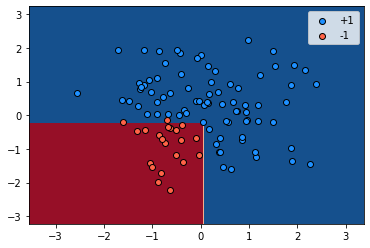

In [50]:
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: clf.predict(x), X_train, y_train)

También podemos inspeccionar el árbol:

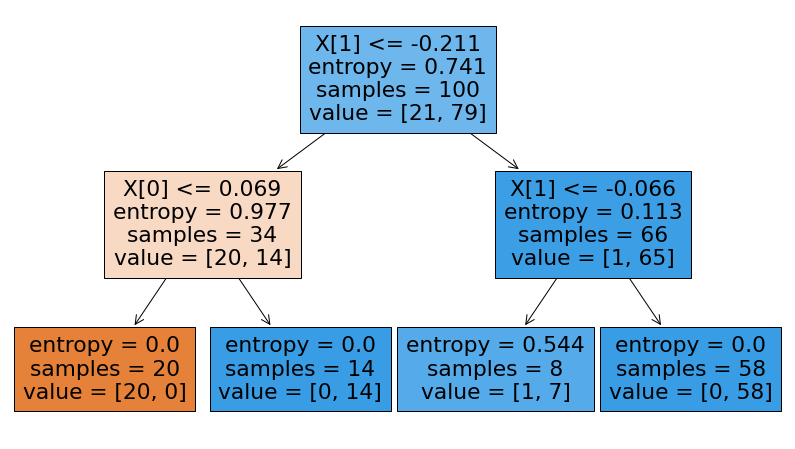

In [51]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(14, 8))

plot_tree(clf, filled=True);

## Ejercicios

- Probar todos los experimentos con un dataset de tipo `XOR`. ¿Qué sucede al decidir la división en el primer nivel del árbol?

**Datos Sintéticos No Linealmente Separables**

Haremos algunos experimentos con datos generados sintéticamente.
Usaremos datos de tipo `XOR` para este ejercicio.

In [52]:
size = 200

In [53]:
np.random.seed(0)

# Muestra de una Distribución Normal
X = np.random.randn(size, 2)

# Datos XOR
y_true = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y_true = y_true.astype(int)

y_true[y_true == 0] = -1

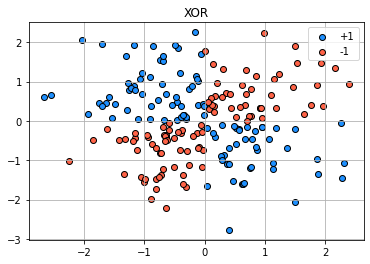

In [54]:
plt.scatter(X[y_true == +1, 0], X[y_true == +1, 1], color=cPositive, edgecolors='k', label='+1')
plt.scatter(X[y_true == -1, 0], X[y_true == -1, 1], color=cNegative, edgecolors='k', label='-1')

plt.title('XOR')
plt.legend()
plt.grid()
plt.show()

**División en Entrenamiento y Evaluación**

Separemos la mitad para entrenamiento y la otra para evaluación.

In [55]:
train_size = size // 2

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_true[:train_size], y_true[train_size:]

X_train.shape, X_test.shape

((100, 2), (100, 2))

**Clasificación Lineal**

Veamos qué tan mal anda un clasificador lineal sobre estos datos.

In [56]:
model = LogisticRegression()
model.fit(X_train, y_train);

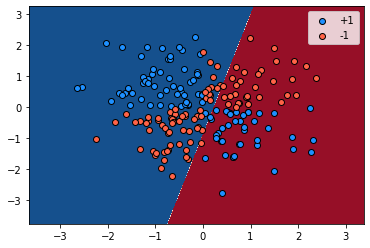

In [57]:
plot_decision_boundary(lambda x: model.predict(x), X, y_true)

In [58]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.51
Test accuracy: 0.41


**Induciendo Separabilidad Lineal**

La diferencia es mucho más notable con datos de tipo `XOR`, en lugar de `OR`.

In [59]:
pre = PolynomialFeatures(
    degree=2,
    interaction_only=True, # Usar solo x0*x1, no x0*x0 ni x1*x1.
    include_bias=False
)

X_train_PF = pre.fit_transform(X_train)

X_train.shape, X_train_PF.shape # Se agregó el feature x0*x1

((100, 2), (100, 3))

In [60]:
X_train[0], X_train_PF[0]

(array([1.76405235, 0.40015721]), array([1.76405235, 0.40015721, 0.70589826]))

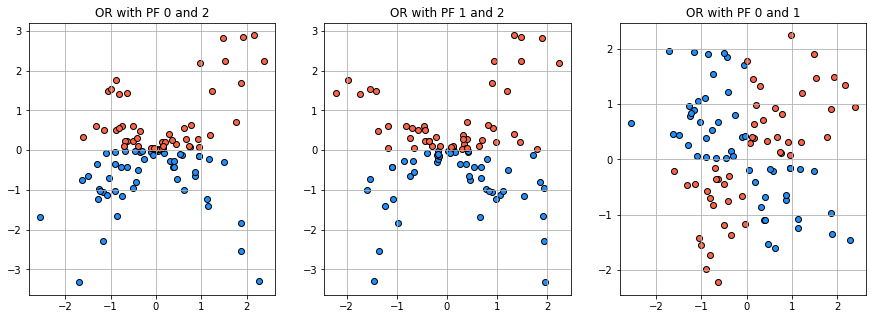

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# PF 0 y 2
axs[0].scatter(X_train_PF[y_train == +1, 0],
               X_train_PF[y_train == +1, 2],
               color=cPositive, edgecolors='k', label='+1')
axs[0].scatter(X_train_PF[y_train == -1, 0],
               X_train_PF[y_train == -1, 2],
               color=cNegative, edgecolors='k', label='-1')

axs[0].set_title('OR with PF 0 and 2')
axs[0].grid()

# PF 1 y 2
axs[1].scatter(X_train_PF[y_train == +1, 1],
               X_train_PF[y_train == +1, 2],
               color=cPositive, edgecolors='k', label='+1')
axs[1].scatter(X_train_PF[y_train == -1, 1],
               X_train_PF[y_train == -1, 2],
               color=cNegative, edgecolors='k', label='-1')

axs[1].set_title('OR with PF 1 and 2')
axs[1].grid()

# PF 0 y 1
axs[2].scatter(X_train_PF[y_train == +1, 0],
               X_train_PF[y_train == +1, 1],
               color=cPositive, edgecolors='k', label='+1')
axs[2].scatter(X_train_PF[y_train == -1, 0],
               X_train_PF[y_train == -1, 1],
               color=cNegative, edgecolors='k', label='-1')

axs[2].set_title('OR with PF 0 and 1')
axs[2].grid()

In [62]:
model = make_pipeline(
    PolynomialFeatures(degree=2, interaction_only=True, include_bias=False),
    LogisticRegression()
)

model.fit(X_train, y_train);

In [63]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 1.0
Test accuracy: 0.97


**Entropía y Valores Reales**

Calculemos la *entropía* inicial, y veamos cómo condicionar la *entropía* sobre variales reales (i.e. **no** categóricas).

In [64]:
y_train

array([-1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1])

In [65]:
probs(y_train)

array([0.48, 0.52])

In [66]:
entropy(y_train)

0.9988455359952018

In [67]:
i = 0

y1, y2 = split(X_train, y_train, i, 0.00)

In [68]:
y1, y2

(array([-1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
        -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1, -1,  1, -1,
        -1,  1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1, -1]),
 array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1,
         1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
         1, -1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        -1]))

In [69]:
entropy(y1), entropy(y2)

(0.9886994082884974, 0.9731560354421095)

In [70]:
cond_entropy(y1, y2)

0.9806168544083758

In [71]:
information_gain(y1, y2)

0.018228681586826

**Buscando la Mejor División**

Probemos muchos *threshold* para ambas variables y seleccionemos la mejor división.

In [72]:
best_ig = 0

for i in [0, 1]:
    for threshold in np.linspace(-2.5, 2.5, 10 + 1):
        y1, y2 = split(X_train, y_train, i, threshold)
        ig = information_gain(y1, y2)
        print(f'i = {i} \t threshold = {threshold:+00.2f} \t IG = {ig:.2f}')

        if ig >= best_ig:
            best_ig = ig
            best_feature = i
            best_threshold = threshold
    print('----------')

print('Mejor División')
print(f'i = {best_feature} \t threshold = {best_threshold} \t IG = {best_ig:00.2f}')

i = 0 	 threshold = -2.50 	 IG = 0.01
i = 0 	 threshold = -2.00 	 IG = 0.01
i = 0 	 threshold = -1.50 	 IG = 0.01
i = 0 	 threshold = -1.00 	 IG = 0.03
i = 0 	 threshold = -0.50 	 IG = 0.00
i = 0 	 threshold = +0.00 	 IG = 0.02
i = 0 	 threshold = +0.50 	 IG = 0.01
i = 0 	 threshold = +1.00 	 IG = 0.00
i = 0 	 threshold = +1.50 	 IG = 0.01
i = 0 	 threshold = +2.00 	 IG = 0.00
i = 0 	 threshold = +2.50 	 IG = 0.00
----------
i = 1 	 threshold = -2.50 	 IG = 0.00
i = 1 	 threshold = -2.00 	 IG = 0.01
i = 1 	 threshold = -1.50 	 IG = 0.01
i = 1 	 threshold = -1.00 	 IG = 0.00
i = 1 	 threshold = -0.50 	 IG = 0.00
i = 1 	 threshold = +0.00 	 IG = 0.00
i = 1 	 threshold = +0.50 	 IG = 0.00
i = 1 	 threshold = +1.00 	 IG = 0.00
i = 1 	 threshold = +1.50 	 IG = 0.01
i = 1 	 threshold = +2.00 	 IG = 0.01
i = 1 	 threshold = +2.50 	 IG = 0.00
----------
Mejor División
i = 0 	 threshold = -1.0 	 IG = 0.03


In [73]:
y1, y2 = split(X_train, y_train, best_feature, best_threshold)

Con esta división, la *entropía* baja levemente:

In [74]:
entropy(y_train)

0.9988455359952018

In [75]:
cond_entropy(y1, y2)

0.9720248660655557

**Árbol de Decisión con Scikit-learn**

Aprendamos un **árbol de decisión** usando *scikit-learn*.

In [76]:
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [77]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Train accuracy: {train_acc:0.3}')
print(f'Test accuracy: {test_acc:0.3}')

Train accuracy: 0.97
Test accuracy: 0.99


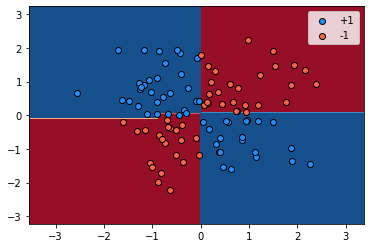

In [78]:
plot_decision_boundary(lambda x: clf.predict(x), X_train, y_train)

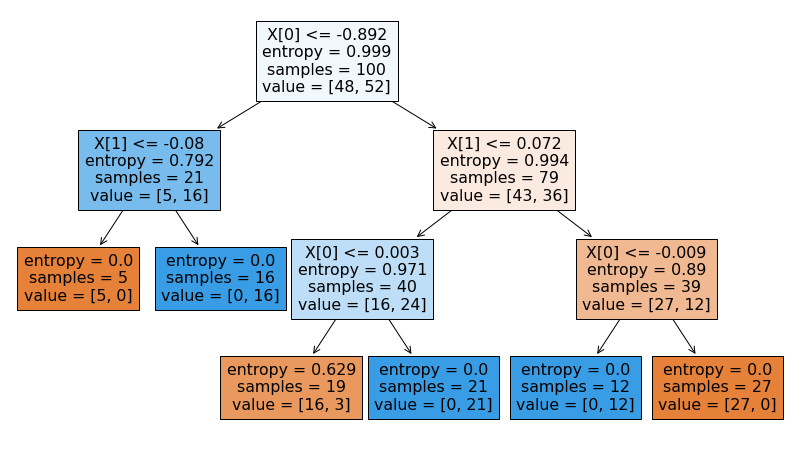

In [79]:
fig = plt.figure(figsize=(14, 8))

plot_tree(clf, filled=True);

## Referencias

Scikit-learn:

- [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [User Guide: Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)